# Supervised Learning with toybrains dataset using Lightning

> Author(s): JiHoon Kim<br>
> Date: 30 May 2023<br>

## Installing Libraries

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# check GPUs available and memory

! gpustat

cuda01                         Tue May 30 16:14:45 2023  470.182.03
[0] NVIDIA GeForce GTX 1080 Ti | 28'C,   0 % |     6 / 11178 MB | gdm(4M)
[1] NVIDIA GeForce GTX 1080 Ti | 33'C,   0 % |     6 / 11178 MB | gdm(4M)
[2] NVIDIA GeForce GTX 1080 Ti | 31'C,   0 % |     6 / 11178 MB | gdm(4M)
[3] NVIDIA GeForce GTX 1080 Ti | 30'C,   0 % |     6 / 11178 MB | gdm(4M)
[4] NVIDIA GeForce GTX 1080 Ti | 28'C,   0 % |     6 / 11178 MB | gdm(4M)
[5] NVIDIA GeForce GTX 1080 Ti | 27'C,   0 % |     6 / 11178 MB | gdm(4M)
[6] NVIDIA GeForce GTX 1080 Ti | 29'C,   0 % |     6 / 11178 MB | gdm(4M)
[7] NVIDIA GeForce GTX 1080 Ti | 27'C,   0 % |     6 / 11178 MB | gdm(4M)


In [3]:
# standard python packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import monai
import lightning as L
from lightning.pytorch.loggers import CSVLogger

In [4]:
# add custom imports
# (TODO) refactoring needed

from utils.dataset import generate_dataset

from utils.lightning import (
    get_dataset_loaders,
    ToyBrainsDataset,
    LightningModel,
    PyTorchMLP,
    LogisticRegression,
    viz_batch
)

## Generating the synthetic dataset

In [ ]:
# ! python create_toybrains.py -d -n 10000

## Loading the DataLoader

`Labels : 'lblbin_stop-smidl-bvol', 'lblbin_stop-smidl-vthick', 'lblbin_bvol-vthick'`

In [5]:
# set random seed

seed = 42

# set raw csv path

raw_csv_path = '/ritter/share/projects/JiHoon/toybrains/toybrains/toybrains_n10000.csv'

# set target label

label = 'lblbin_bvol-vthick'

In [6]:
# set seed for PyTorch

torch.manual_seed(seed)

# split the dataset for training, validation, and test from raw dataset

DF_train, DF_val, DF_test = generate_dataset(raw_csv_path, label, seed)

# prepare the dataLaoder

train_loader, val_loader, test_loader = get_dataset_loaders(DF_train, DF_val, DF_test)

### Vizualize the Batch on DataLoader


Label distribution: [(0, 3953), (1, 4047)]
Majority class: 1
Accuracy when always predicting the majority class: 0.51 (50.59%)


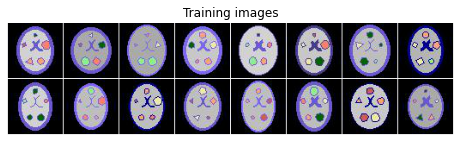


Label distribution: [(0, 488), (1, 512)]
Majority class: 1
Accuracy when always predicting the majority class: 0.51 (51.20%)


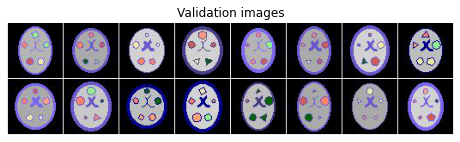


Label distribution: [(0, 531), (1, 469)]
Majority class: 0
Accuracy when always predicting the majority class: 0.53 (53.10%)


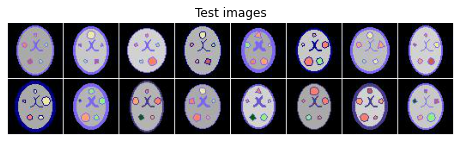

In [7]:
viz_batch(train_loader, title="Training images", debug=True)
viz_batch(val_loader, title="Validation images", debug=True)
viz_batch(test_loader, title="Test images", debug=True)

## Predictive Modeling

Tasks : [baseline model](https://github.com/RoshanRane/toybrains/issues/1)

In [8]:
# set the seed for Lightning

L.seed_everything(seed)

Global seed set to 42


42

In [9]:
# multi layer perceprton implementation

pytorch_model = PyTorchMLP(num_features=12288, num_classes=2)

In [ ]:
# set denseNet model as default

# pytorch_model = monai.networks.nets.DenseNet121(spatial_dims=2, in_channels=3, out_channels=2)

In [ ]:
# chcek the available model in resnet

# entrypoints = torch.hub.list('pytorch/vision:v0.13.0', force_reload=True)
# for e in entrypoints:
#     if "resnet" in e:
#         print(e)

In [ ]:
# resnet implementation

# pytorch_model = torch.hub.load('pytorch/vision:v0.13.0', 'resnet18', weights='IMAGENET1K_V1')

# for param in pytorch_model.parameters():
#     param.requires_grad = False
    
# pytorch_model.fc = torch.nn.Linear(512, 2)

In [ ]:
# logistic regression implmententation

# pytorch_model = LogisticRegression(num_features=12288)

In [10]:
# set lightning model

lightning_model = LightningModel(model=pytorch_model, learning_rate=0.05)

In [11]:
trainer = L.Trainer(
    max_epochs=10,
    accelerator="gpu",
    devices=[0],
    logger=CSVLogger(save_dir="logs/", name="my_model"),
    deterministic=True
)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [12]:
trainer.fit(
    model=lightning_model,
    train_dataloaders=train_loader,
    val_dataloaders=val_loader,
)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]

  | Name      | Type           | Params
---------------------------------------------
0 | model     | PyTorchMLP     | 615 K 
1 | train_acc | BinaryAccuracy | 0     
2 | val_acc   | BinaryAccuracy | 0     
3 | test_acc  | BinaryAccuracy | 0     
---------------------------------------------
615 K     Trainable params
0         Non-trainable params
615 K     Total params
2.463     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


In [13]:
train_acc = trainer.test(dataloaders=train_loader)[0]["accuracy"]
val_acc = trainer.test(dataloaders=val_loader)[0]["accuracy"]
test_acc = trainer.test(dataloaders=test_loader)[0]["accuracy"]

print(
    f"Train Acc {train_acc*100:.2f}%"
    f" | Val Acc {val_acc*100:.2f}%"
    f" | Test Acc {test_acc*100:.2f}%"
)

`.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
Restoring states from the checkpoint path at logs/my_model/version_4/checkpoints/epoch=9-step=5000.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
Loaded model weights from checkpoint at logs/my_model/version_4/checkpoints/epoch=9-step=5000.ckpt
Your `test_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test/predict dataloaders.
The dataloader, test_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         accuracy          │    0.5058749914169312     │
└───────────────────────────┴───────────────────────────┘

Restoring states from the checkpoint path at logs/my_model/version_4/checkpoints/epoch=9-step=5000.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
Loaded model weights from checkpoint at logs/my_model/version_4/checkpoints/epoch=9-step=5000.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         accuracy          │    0.5120000243186951     │
└───────────────────────────┴───────────────────────────┘

Restoring states from the checkpoint path at logs/my_model/version_4/checkpoints/epoch=9-step=5000.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
Loaded model weights from checkpoint at logs/my_model/version_4/checkpoints/epoch=9-step=5000.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         accuracy          │    0.4690000116825104     │
└───────────────────────────┴───────────────────────────┘

Train Acc 50.59% | Val Acc 51.20% | Test Acc 46.90%


`Bug on below code: if you use mlti gpu then you may found the several version_X generated on one run.` <br>
Please specify correct metrics.csv which contain all. <br>
(TODO) Refactoring the code on result plot

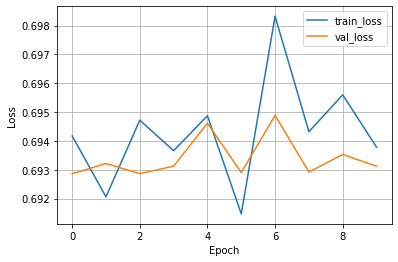

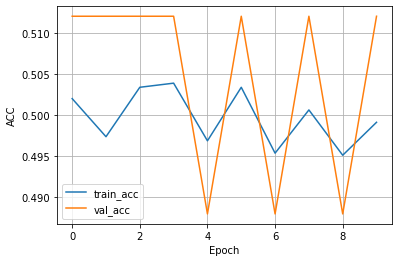

In [14]:
metrics = pd.read_csv(f"logs/my_model/version_4/metrics.csv")

aggreg_metrics = []
agg_col = "epoch"
for i, dfg in metrics.groupby(agg_col):
    agg = dict(dfg.mean())
    agg[agg_col] = i
    aggreg_metrics.append(agg)

df_metrics = pd.DataFrame(aggreg_metrics)
df_metrics[["train_loss", "val_loss"]].plot(
    grid=True, legend=True, xlabel="Epoch", ylabel="Loss"
)
df_metrics[["train_acc", "val_acc"]].plot(
    grid=True, legend=True, xlabel="Epoch", ylabel="ACC"
)

plt.show()

In [ ]:
PATH = "lightning.pt"
torch.save(pytorch_model.state_dict(), PATH)